In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
df = pandas.read_csv('data/MLTempDataset1.csv')
df.head

<bound method NDFrame.head of       Unnamed: 0             Datetime  Hourly_Temp
0              0  2022-01-04 00:00:00       20.867
1              1  2022-01-04 01:00:00       21.000
2              2  2022-01-04 02:00:00       20.867
3              3  2022-01-04 03:00:00       20.650
4              4  2022-01-04 04:00:00       20.400
...          ...                  ...          ...
7051        7051  2022-10-24 19:00:00       25.567
7052        7052  2022-10-24 20:00:00       25.183
7053        7053  2022-10-24 21:00:00       24.600
7054        7054  2022-10-24 22:00:00       23.986
7055        7055  2022-10-24 23:00:00       23.383

[7056 rows x 3 columns]>

In [2]:
#df['Date'] = pandas.to_datetime(df['Date'], format = "%Y-%m-%d")
#df.set_index('Date', inplace = True)
#df.head

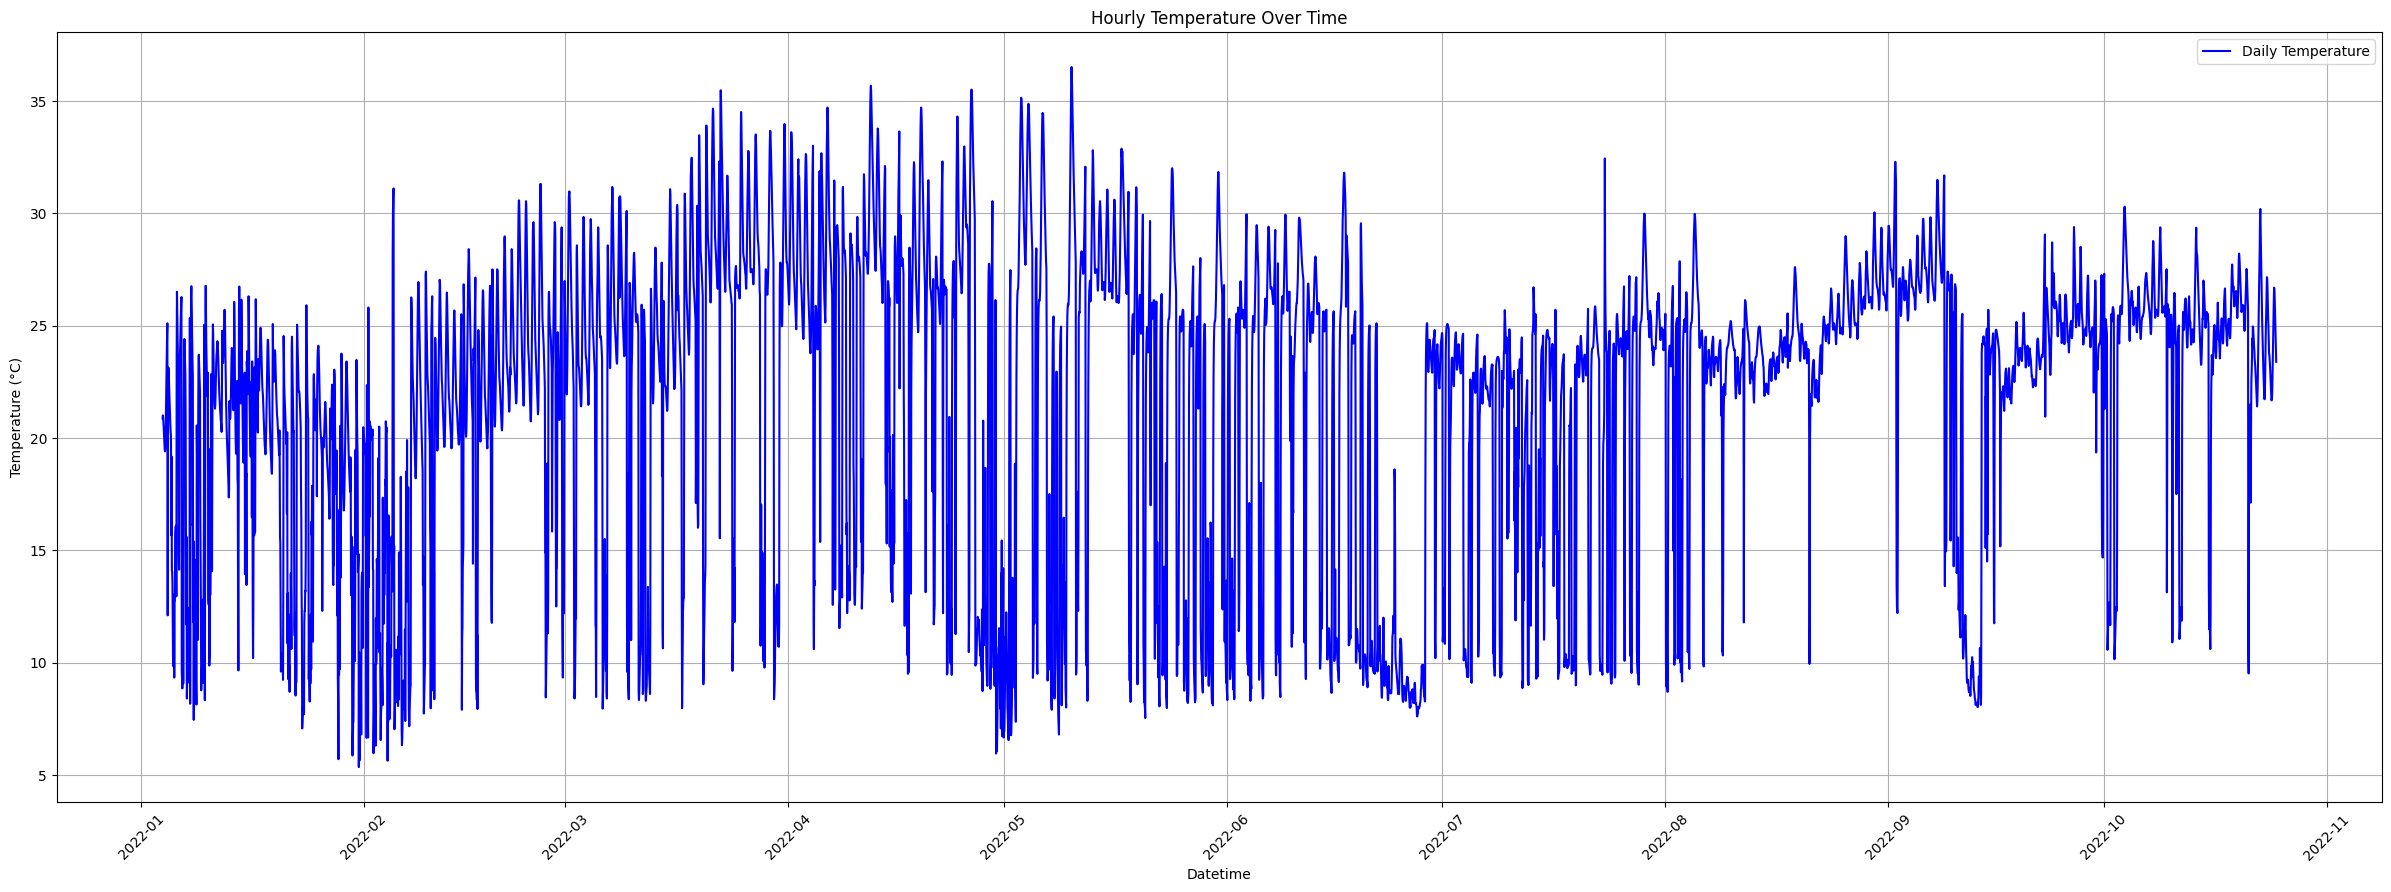

In [3]:
df['Datetime'] = pandas.to_datetime(df['Datetime'])

# Plot Hourly_Temp vs Datetime
plt.figure(figsize=(30, 10))
plt.plot(df['Datetime'], df['Hourly_Temp'], label='Daily Temperature', color='b')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.title('Hourly Temperature Over Time')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [4]:
y = df["Hourly_Temp"]
actual_vs_forecast = []
for i in range(-220, -200, 1):  # Loop from -200 to -210
    trainy = df["Hourly_Temp"].iloc[:i]  # Training set
    testy = df["Hourly_Temp"].iloc[i:]   # Testing set
    
    # Fit SARIMAX model
    model = SARIMAX(trainy, order=(14, 1, 1), seasonal_order=(0, 1, 1, 12))
    model_fit = model.fit()
    
    # Forecasting
    forecast = model_fit.forecast(steps=abs(i))  # Forecast length matches test set size
    

C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mckays1\OneDrive - Wentwo

In [5]:
 forecast = model_fit.forecast(steps=len(testy))  # Forecast length matches test set size
    
    # Store actual vs forecasted values
    actual_vs_forecast.extend(zip(testy.tolist(), forecast.tolist()))

# Convert to DataFrame for analysis
results_df = pd.DataFrame(actual_vs_forecast, columns=["Actual", "Forecasted"])

# Compute accuracy using Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(results_df["Actual"], results_df["Forecasted"])
accuracy = 100 * (1 - mape)

print(f"Forecasting Accuracy: {accuracy:.2f}%")

IndentationError: unexpected indent (2464297641.py, line 4)

In [ ]:
 # Plot
    plt.figure(figsize=(20, 15))
    plt.xlim(6800, 6850)
    plt.plot(trainy.index, trainy.values, label="Training Data", color='black')
    plt.plot(testy.index, testy, label="Actual", color='blue')
    plt.plot(testy.index, forecast, label="Forecast", color='red', linestyle='dashed')
    
    plt.grid()
    plt.legend()
    plt.title(f"Forecast for Test Size: {abs(i)}")
    
    plt.show()

In [5]:
#auto_model = auto_arima(trainy, seasonal=True, stepwise=False, trace=True)
#print(auto_model.order)

C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=33178.362, Time=2.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33694.675, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33627.939, Time=0.12 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33624.751, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33692.675, Time=0.04 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.21 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=33186.120, Time=1.48 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=33180.104, Time=3.04 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=33173.990, Time=3.32 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.16 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=33181.322, Time=3.68 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=33176.455, Time=1.63 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=33174.366, Time=2.02 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=33179.512, Time=3.69 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=33172.041, Time=1.40 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=33171.429, Time=0.73 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0]             : AIC=33561.879, Time=0.26 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.61 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=33172.424, Time=0.90 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=33624.269, Time=0.15 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,0)[0]             : AIC=33523.449, Time=0.28 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=33176.408, Time=1.10 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=33174.001, Time=1.79 sec

Best model:  ARIMA(1,1,3)(0,0,0)[0]          
Total fit time: 32.273 seconds
(1, 1, 3)


In [6]:
result = adfuller(trainy)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -9.296837572598458
p-value: 1.140115449693266e-15


In [7]:
model = SARIMAX(trainy, order=(14, 1, 1), seasonal_order=(0,1,1,12))
model_fit = model.fit()

KeyboardInterrupt: 

In [ ]:
forecast = model_fit.forecast(steps=200)
forecast

In [ ]:
plt.figure(figsize = (20,15))
plt.xlim(6500, testy.index[-1])
plt.plot(trainy.index,trainy.values)
#plt.plot(test.index,test.values)
#plt.plot(test.index,forecast.values)
plt.plot(testy.index, testy, label="Actual", color='blue')
plt.plot(testy.index, forecast, label="Forecast", color='red', linestyle='dashed')
plt.grid()
plt.show()